In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

C:\anaconda\envs\epsilon\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\anaconda\envs\epsilon\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\anaconda\envs\epsilon\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## load data

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Data",shuffle=True,image_size=(256,256),batch_size=32
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

 ## Visualization for one batch

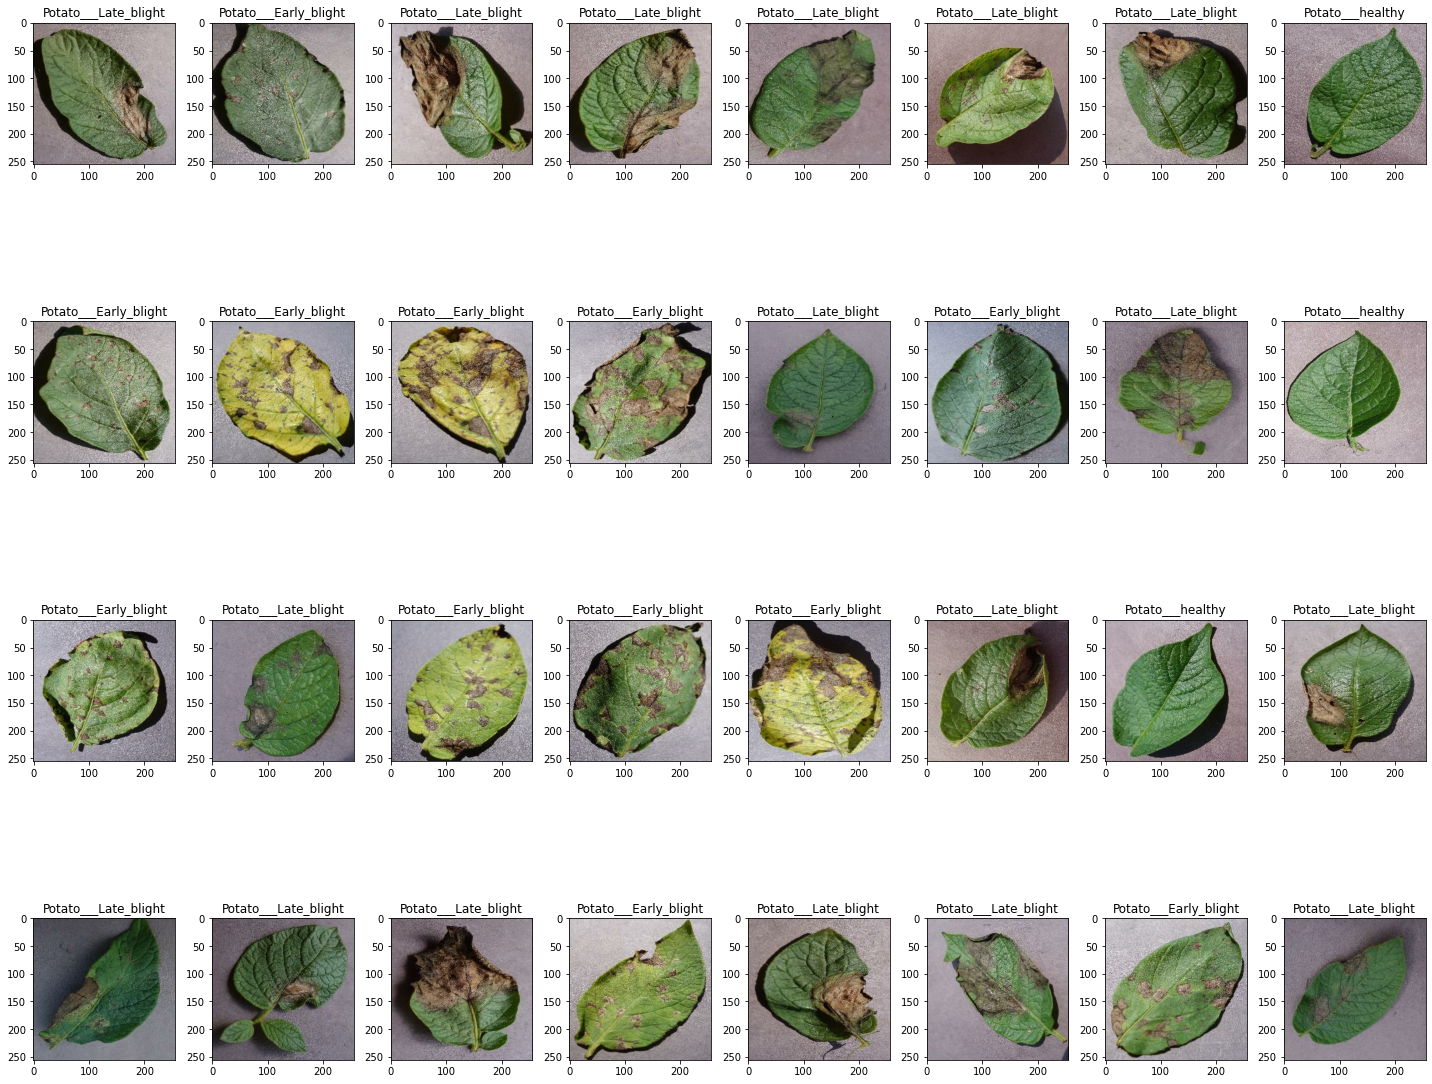

In [5]:
plt.figure(figsize=(20,20),tight_layout=True)
for image_batch,label_batch in dataset.take(2):
    for i in range(32):
        ax=plt.subplot(4,8,i+1)
        plt.imshow(image_batch[i]/255)
        plt.title(class_names[label_batch[i]])

## Split data into Train ,Validation and Test

In [6]:
train_size=0.8
int(len(dataset)*train_size)

54

In [7]:
train_ds=dataset.take(54)

In [8]:
test_ds=dataset.skip(54)


In [9]:
val_size=0.5
len(test_ds)*val_size
val_ds=test_ds.take(7)

In [10]:
test_ds=test_ds.skip(7)

In [11]:
print(f"the len of train dataset is : {len(train_ds)} Batch")
print(f"the len of val dataset is : {len(val_ds)} Batch")
print(f"the len of test dataset is : {len(test_ds)} Batch")

the len of train dataset is : 54 Batch
the len of val dataset is : 7 Batch
the len of test dataset is : 7 Batch


In [11]:
train_ds=train_ds.cache().prefetch(tf.data.AUTOTUNE)
val_ds=val_ds.cache().prefetch(tf.data.AUTOTUNE)
test_ds=test_ds.cache().prefetch(tf.data.AUTOTUNE)

## pre_processing

In [12]:
rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1/255)
])

In [13]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [15]:

model=tf.keras.Sequential([
    rescale,
    data_augmentation,
    layers.Conv2D(16,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)),
    layers.MaxPool2D(),
    layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(86,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(3,activation="softmax")   
])


In [25]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"]
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=20,
    batch_size=32,
    validation_data=val_ds
   
)

Epoch 1/20
54/54 [==============================] - 17s 185ms/step - loss: 0.6461 - accuracy: 0.7222 - val_loss: 0.6927 - val_accuracy: 0.7991
Epoch 2/20
54/54 [==============================] - 10s 183ms/step - loss: 0.4205 - accuracy: 0.8466 - val_loss: 0.4607 - val_accuracy: 0.8036
Epoch 3/20
54/54 [==============================] - 10s 181ms/step - loss: 0.3333 - accuracy: 0.8582 - val_loss: 0.4504 - val_accuracy: 0.8304
Epoch 4/20
54/54 [==============================] - 10s 185ms/step - loss: 0.3260 - accuracy: 0.8623 - val_loss: 0.3521 - val_accuracy: 0.8616
Epoch 5/20
54/54 [==============================] - 10s 183ms/step - loss: 0.1843 - accuracy: 0.9334 - val_loss: 0.1552 - val_accuracy: 0.9286
Epoch 6/20
54/54 [==============================] - 10s 180ms/step - loss: 0.1693 - accuracy: 0.9369 - val_loss: 0.2312 - val_accuracy: 0.9152
Epoch 7/20
54/54 [==============================] - 10s 180ms/step - loss: 0.1683 - accuracy: 0.9329 - val_loss: 0.1861 - val_accuracy: 0.9241

In [38]:
model.evaluate(test_ds)

7/7 [==============================] - 3s 108ms/step - loss: 0.1205 - accuracy: 0.9400


[0.12045399844646454, 0.9399999976158142]

<Axes: >

<Figure size 1440x1440 with 0 Axes>

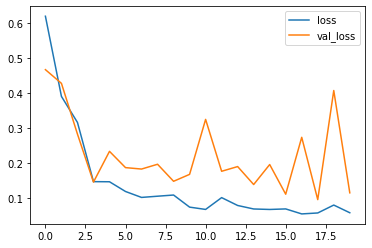

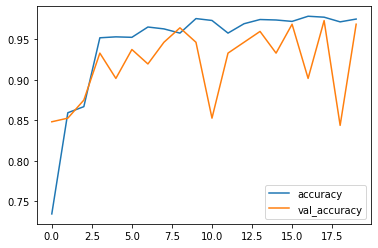

In [39]:
import pandas as pd
plt.figure(figsize=(20,20))
history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()


## show prediction for one batch

In [49]:
def show_prediction_for_1_batch(model):
    plt.figure(figsize=(25,20),tight_layout=True)
    for images_batch,labels_batch  in test_ds.take(1):
        batch_prediction=model.predict(images_batch)
        for i in range(32):
            ax=plt.subplot(8,4,i+1)
            image=images_batch[i]/255
            label=class_names[labels_batch[i]]
            #print("this is the first image to predict :")
            plt.imshow(image)
            plt.title(f"actual: {label}\npredicted: {class_names[batch_prediction[i].argmax()]}\ncofidence: {round(batch_prediction[i].max()*100)}% ")
            #print("actual label for this image is : ", first_label)
            #print("predict label for this image is : ",class_names[batch_prediction[i].argmax()])
            #print("cofidence is : ", round(batch_prediction[i].max()*100),"%")
            plt.axis("off")

1/1 [==============================] - 0s 120ms/step


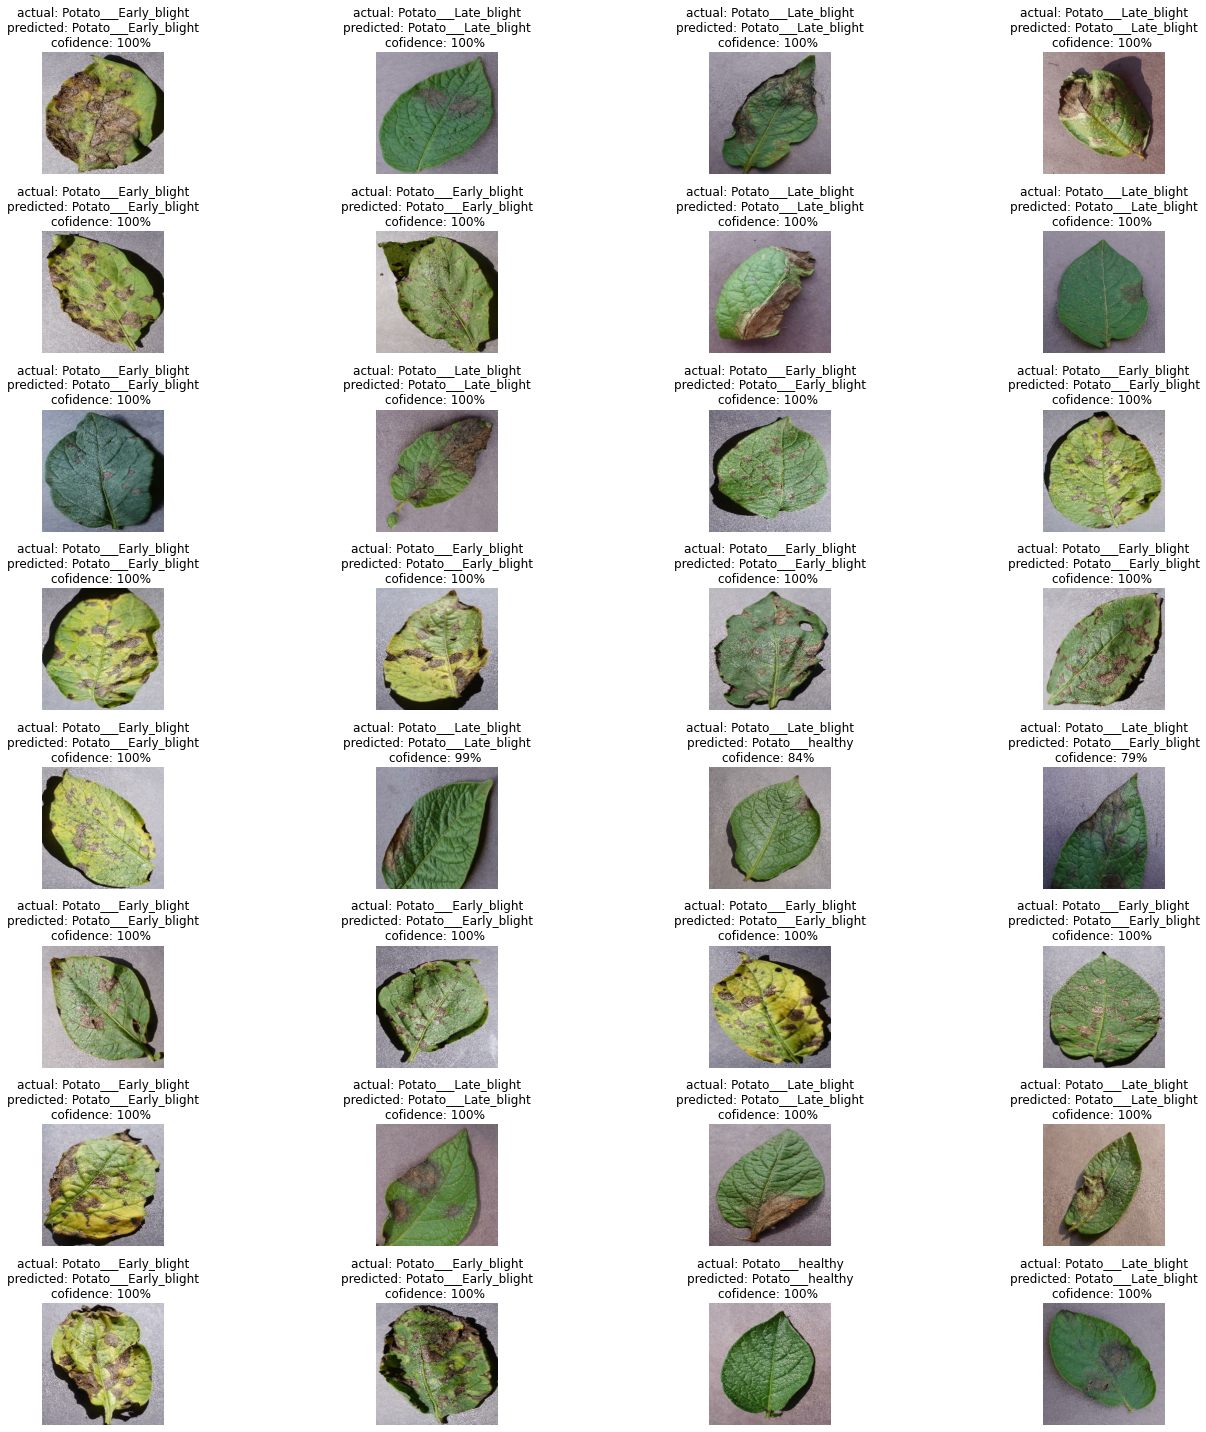

In [50]:
show_prediction_for_1_batch(model)

In [55]:
# Save the model to disk
#model.save('my_image_classification_model.h5')

In [2]:
from tensorflow import keras
# Load the pre-trained Keras model
model = keras.models.load_model('my_image_classification_model.h5')

In [56]:
import tensorflow as tf
import numpy as np
from PIL import Image
def prediction(image_path):
    class_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
    img = Image.open(image_path)
    img = img.resize((256, 256))
    img_array = np.array(img) / 255.0  # convert to float32 and normalize
    # Make a prediction
    prediction = model.predict(np.expand_dims(img_array, axis=0))[0]
    return class_names[np.argmax(prediction)]


In [58]:
prediction(r"D:\potato\potato disease\traning\Data\Potato___healthy\2dee1571-ef6b-40ef-8c46-334e89aad3f1___RS_HL 1950.JPG")

1/1 [==============================] - 0s 72ms/step


'Potato___Early_blight'

## Transfer learning 

## VGG16

In [14]:
from tensorflow.keras.applications import VGG16

In [15]:
# Define the input shape of the images
img_shape=(256,256,3)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Create an instance of EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


# Load the pre-trained model
base_model = VGG16(input_shape=img_shape, weights='imagenet', include_top=False)
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
model=tf.keras.Sequential([
    rescale,
    data_augmentation,
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax'),
])
    


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [19]:
history=model.fit(
    train_ds,
    epochs=10,
    batch_size=32,
    validation_data=val_ds, 
    callbacks=[early_stopping]
)

Epoch 1/10
54/54 [==============================] - 46s 472ms/step - loss: 0.8877 - accuracy: 0.8362 - val_loss: 0.2042 - val_accuracy: 0.9196
Epoch 2/10
54/54 [==============================] - 23s 420ms/step - loss: 0.1783 - accuracy: 0.9306 - val_loss: 0.1757 - val_accuracy: 0.9241
Epoch 3/10
54/54 [==============================] - 23s 429ms/step - loss: 0.1868 - accuracy: 0.9358 - val_loss: 0.1683 - val_accuracy: 0.9375
Epoch 4/10
54/54 [==============================] - 23s 427ms/step - loss: 0.2388 - accuracy: 0.9271 - val_loss: 0.5268 - val_accuracy: 0.8571
Epoch 5/10
54/54 [==============================] - 23s 427ms/step - loss: 0.2313 - accuracy: 0.9358 - val_loss: 0.3744 - val_accuracy: 0.8929
Epoch 6/10
54/54 [==============================] - 23s 428ms/step - loss: 0.1117 - accuracy: 0.9670 - val_loss: 0.1990 - val_accuracy: 0.9464


In [21]:
model.evaluate(test_ds)

7/7 [==============================] - 8s 987ms/step - loss: 0.0867 - accuracy: 0.9600


[0.08672507107257843, 0.9599999785423279]

## VGG19

In [14]:
from tensorflow.keras.applications import VGG19

In [15]:
# Define the input shape of the images
img_shape=(256,256,3)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Create an instance of EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


# Load the pre-trained model
base_model = VGG19(input_shape=img_shape, weights='imagenet', include_top=False)
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
model=tf.keras.Sequential([
    rescale,
    data_augmentation,
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax'),
])
    


80134624/80134624 [==============================] - 22s 0us/step


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history=model.fit(
    train_ds,
    epochs=10,
    batch_size=32,
    validation_data=val_ds, 
    callbacks=[early_stopping]
)

Epoch 1/10
54/54 [==============================] - 55s 621ms/step - loss: 2.2098 - accuracy: 0.7569 - val_loss: 0.2884 - val_accuracy: 0.9018
Epoch 2/10
54/54 [==============================] - 32s 587ms/step - loss: 0.2183 - accuracy: 0.9236 - val_loss: 0.1869 - val_accuracy: 0.9330
Epoch 3/10
54/54 [==============================] - 34s 622ms/step - loss: 0.1564 - accuracy: 0.9491 - val_loss: 0.2673 - val_accuracy: 0.8884
Epoch 4/10
54/54 [==============================] - 34s 622ms/step - loss: 0.2600 - accuracy: 0.9201 - val_loss: 0.1663 - val_accuracy: 0.9241
Epoch 5/10
54/54 [==============================] - 33s 621ms/step - loss: 0.1227 - accuracy: 0.9520 - val_loss: 0.1760 - val_accuracy: 0.9598
Epoch 6/10
54/54 [==============================] - 34s 621ms/step - loss: 0.1414 - accuracy: 0.9549 - val_loss: 0.5978 - val_accuracy: 0.8125
Epoch 7/10
54/54 [==============================] - 34s 622ms/step - loss: 0.1151 - accuracy: 0.9606 - val_loss: 0.1549 - val_accuracy: 0.9509

In [20]:
model.evaluate(test_ds)

7/7 [==============================] - 9s 1s/step - loss: 0.1276 - accuracy: 0.9600


[0.12759281694889069, 0.9599999785423279]

## ResNet50

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
# Create an instance of EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# Load the ResNet50 model with pre-trained weights
base_model = ResNet50(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
# Freeze all layers except the last one
for layer in base_model.layers:
    layer.trainable = False
    
model=tf.keras.Sequential([
    rescale,
    data_augmentation,
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax'),
])


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(
    train_ds,
    epochs=10,
    batch_size=32,
    validation_data=val_ds, 
    callbacks=[early_stopping]
)

Epoch 1/10
54/54 [==============================] - 32s 378ms/step - loss: 5.5213 - accuracy: 0.6204 - val_loss: 0.5583 - val_accuracy: 0.7946
Epoch 2/10
54/54 [==============================] - 16s 302ms/step - loss: 0.7589 - accuracy: 0.7240 - val_loss: 0.5647 - val_accuracy: 0.8036
Epoch 3/10
54/54 [==============================] - 16s 304ms/step - loss: 0.5636 - accuracy: 0.7992 - val_loss: 0.5102 - val_accuracy: 0.8036
Epoch 4/10
54/54 [==============================] - 17s 308ms/step - loss: 0.6039 - accuracy: 0.7749 - val_loss: 0.4998 - val_accuracy: 0.8080
Epoch 5/10
54/54 [==============================] - 17s 308ms/step - loss: 0.5043 - accuracy: 0.8200 - val_loss: 0.4521 - val_accuracy: 0.8348
Epoch 6/10
54/54 [==============================] - 17s 313ms/step - loss: 0.5155 - accuracy: 0.8148 - val_loss: 0.4351 - val_accuracy: 0.8259
Epoch 7/10
54/54 [==============================] - 17s 308ms/step - loss: 0.5812 - accuracy: 0.7928 - val_loss: 0.4982 - val_accuracy: 0.8125

In [18]:
model.evaluate(test_ds)

7/7 [==============================] - 4s 300ms/step - loss: 0.5037 - accuracy: 0.8050


[0.5036747455596924, 0.8050000071525574]

## InceptionV3

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping
# Create an instance of EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# Load the ResNet50 model with pre-trained weights
base_model = InceptionV3(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
# Freeze all layers except the last one
for layer in base_model.layers:
    layer.trainable = False
    
model=tf.keras.Sequential([
    rescale,
    data_augmentation,
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax'),
])


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(
    train_ds,
    epochs=10,
    batch_size=32,
    validation_data=val_ds, 
    callbacks=[early_stopping]
)

Epoch 1/10
54/54 [==============================] - 45s 445ms/step - loss: 6.6433 - accuracy: 0.7616 - val_loss: 0.4554 - val_accuracy: 0.8839
Epoch 2/10
54/54 [==============================] - 17s 313ms/step - loss: 0.2614 - accuracy: 0.9259 - val_loss: 0.3440 - val_accuracy: 0.8973
Epoch 3/10
54/54 [==============================] - 17s 314ms/step - loss: 0.1515 - accuracy: 0.9531 - val_loss: 0.2746 - val_accuracy: 0.9152
Epoch 4/10
54/54 [==============================] - 18s 330ms/step - loss: 0.1715 - accuracy: 0.9462 - val_loss: 0.2249 - val_accuracy: 0.9330
Epoch 5/10
54/54 [==============================] - 17s 311ms/step - loss: 0.1287 - accuracy: 0.9537 - val_loss: 0.2059 - val_accuracy: 0.9464
Epoch 6/10
54/54 [==============================] - 17s 313ms/step - loss: 0.1440 - accuracy: 0.9589 - val_loss: 0.2354 - val_accuracy: 0.9330
Epoch 7/10
54/54 [==============================] - 17s 311ms/step - loss: 0.2086 - accuracy: 0.9473 - val_loss: 0.4603 - val_accuracy: 0.8839

## EfficientNetB0

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping
# Create an instance of EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# Load the ResNet50 model with pre-trained weights
base_model =EfficientNetB0(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
# Freeze all layers except the last one
for layer in base_model.layers:
    layer.trainable = False
    
model=tf.keras.Sequential([
    rescale,
    data_augmentation,
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax'),
])


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(
    train_ds,
    epochs=10,
    batch_size=32,
    validation_data=val_ds, 
    callbacks=[early_stopping]
)

Epoch 1/10
